### HW4. Numerical Integration
### 2022313047 Boyeon,Kim

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import quad

In [92]:
# Set plot params
plt.rcParams['figure.figsize'] = [5,5]
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['xtick.major.size'] = 7
plt.rcParams['ytick.major.size'] = 7
plt.rcParams['xtick.minor.size'] = 3.5
plt.rcParams['ytick.minor.size'] = 3.5
plt.rcParams['xtick.major.width'] = 1.5
plt.rcParams['ytick.major.width'] = 1.5
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.minor.width'] = 1.5
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

### Consider the integral: $f(x)=\int_0^\pi \sin (x) d x$.

#### 1. Use Simpson’s rule and Gaussian quadrature (with 2, 3, or 4 nodes) to calculate the integral using 4, 8, 16, and 32 intervals. Plot the error versus the number of points in a log-log plot

In [8]:
# Define the integrand
def f(x):
    return np.sin(x)


In [9]:
# Define Simpson's rule
def simpson(f, x0, xN, num_pts):
    h = (xN - x0) / (float(num_pts - 1))
    x_pts = np.linspace(x0, xN, num_pts)
    data = f(x_pts)
    appx = (1/3) * h * (data[0] + data[-1] + 4*np.sum(data[1:-1:2]) + 2* np.sum(data[2:-2:2]))
    return appx

In [59]:
# Defin Gaussian quadrature
def Gq(f, a, b, num_node):
    x, w = np.polynomial.legendre.leggauss(num_node)
    y = f((b-a)/2 * np.array(x) + (b+a)/2)
    appx = (b-a)/2 * np.sum(w * y)
    return appx

##### Simpson's Rule

In [33]:
# real value = 2
exact = 2.
num_inter = np.array([4, 8, 16, 32])

old_err = 1
x0 = 0
xN = np.pi

print('  Simpson\' Rule')
print('  n    appx       error           convergence rate')
err_window = []
for num_pts in num_inter:
    appx = simpson(f, x0, xN, num_pts+1)
    err = abs(exact - appx)
    ratio = old_err/err
    old_err = err
    err_window.append(err)
    print(f' {num_pts:2d}    {appx:6f}   {err:4e}    {ratio:.2f}')

  Simpson' Rule
  n    appx       error           convergence rate
  4    2.004560   4.559755e-03    219.31
  8    2.000269   2.691699e-04    16.94
 16    2.000017   1.659105e-05    16.22
 32    2.000001   1.033369e-06    16.06


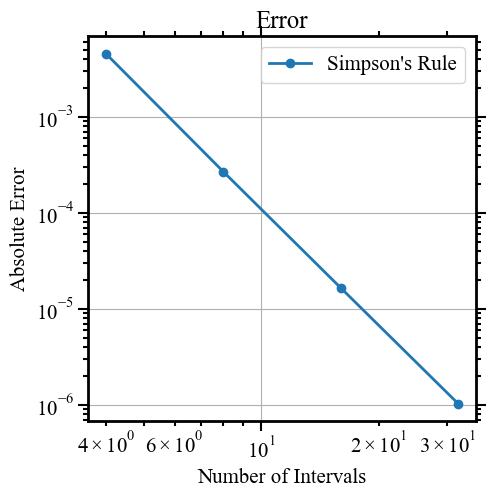

In [37]:
# Plot the errors versus the number of intervals in a log-log plot
plt.loglog(num_inter, err_window, 'o-', label='Simpson\'s Rule')
plt.xlabel('Number of Intervals')
plt.ylabel('Absolute Error')
plt.title('Error')
plt.legend()
plt.grid()
plt.show()

##### Gaussian quadrature rule

In [71]:
num_nodes = [2, 3, 4]
old_err = 1
err_window = []
for num in num_nodes:
    print(f'\n Gaussian Quadrature Rule :{num} node')
    print('  n    appx       error           convergence rate')
    for num_pts in num_inter:
        appx = Gq(f, x0, xN, num)
        err = abs(exact - appx)
        ratio = old_err/err
        old_err = err
        err_window.append(err)
        print(f' {num_pts:2d}    {appx:6f}   {err:4e}    {ratio:.2f}')



 Gaussian Quadrature Rule :2 node
  n    appx       error           convergence rate
  4    1.935820   6.418043e-02    0.00
  8    1.935820   6.418043e-02    1.00
 16    1.935820   6.418043e-02    1.00
 32    1.935820   6.418043e-02    1.00

 Gaussian Quadrature Rule :3 node
  n    appx       error           convergence rate
  4    2.001389   1.388914e-03    46.21
  8    2.001389   1.388914e-03    1.00
 16    2.001389   1.388914e-03    1.00
 32    2.001389   1.388914e-03    1.00

 Gaussian Quadrature Rule :4 node
  n    appx       error           convergence rate
  4    1.999984   1.577154e-05    88.06
  8    1.999984   1.577154e-05    1.00
 16    1.999984   1.577154e-05    1.00
 32    1.999984   1.577154e-05    1.00


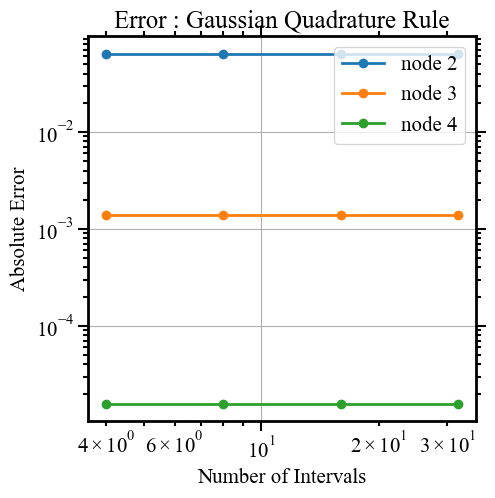

In [95]:
err_window = np.reshape(err_window, (len(num_nodes), len(num_inter)))

# Plot the errors versus the number of intervals in a log-log plot
plt.loglog(num_inter, err_window[0], 'o-', label='node 2')
plt.loglog(num_inter, err_window[1], 'o-', label='node 3')
plt.loglog(num_inter, err_window[2], 'o-', label='node 4')
plt.xlabel('Number of Intervals')
plt.ylabel('Absolute Error')
plt.title('Error : Gaussian Quadrature Rule')
plt.legend()
plt.grid()
plt.show()

### 2. Develop a quadrature method based on cubic spline interpolation.

In [112]:
import numpy as np
from scipy.interpolate import CubicSpline

def cubic_spline_quadrature(f, a, b, n, rule='midpoint'):
    # Generate n+1 equally spaced nodes
    x = np.linspace(a, b, n+1)
    # Evaluate the function at the nodes
    y = f(x)
    # Compute the coefficients of the cubic spline
    cs = CubicSpline(x, y, bc_type='natural')
    # Compute the integral using the chosen quadrature rule
    if rule == 'midpoint':
        # Midpoint rule
        h = (b-a)/n
        x_mid = np.linspace(a+h/2, b-h/2, n)
        integral = np.sum(f(x_mid))*h
    elif rule == 'trapezoidal':
        # Trapezoidal rule
        h = (b-a)/n
        x_trap = np.linspace(a+h, b-h, n-1)
        integral = (f(a) + f(b) + 2*np.sum(f(x_trap)))*h/2
    elif rule == 'simpson':
        # Simpson's rule
        h = (b-a)/(2*n)
        x_simpson = np.linspace(a+h, b-h, n)
        integral = (f(a) + f(b) + 4*np.sum(f(x_simpson[::2])) + 2*np.sum(f(x_simpson[1::2])))*h/3
    else:
        raise ValueError('Invalid quadrature rule')
    return integral

# Define the integrand function
def f(x):
    return np.sin(x)

# Exact value of the integral
exact = 2

# List of numbers of intervals to use
n_values = [4, 8, 16, 32, 64, 128, 256, 512, 1024]

# Compute the approximated values and errors using the midpoint rule
methods = ['midpoint', 'trapezoidal', 'simpson']
err_window = []
value_window = []
for method in methods:
    for n in n_values:
        approx = cubic_spline_quadrature(f, 0, np.pi, n, method)
        value_window.append(approx)
        err_window.append(abs(approx - exact))


In [116]:
err_window = np.reshape(err_window, (len(methods), len(n_values)))


### 3. Use the cubic spline-quadrature method developed in part 2 to calculate the integral. Discuss the error for numerical integrations by varying the number of intervals.

<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

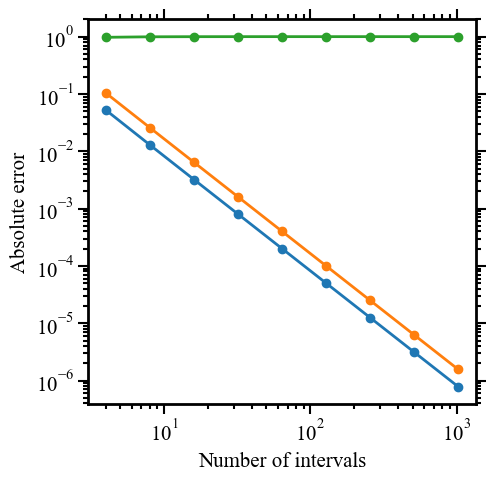

In [117]:

# Plot the errors versus the number of intervals
import matplotlib.pyplot as plt
plt.loglog(n_values, err_window[0], 'o-', label = 'midpoint')
plt.loglog(n_values, err_window[1], 'o-', label = 'trapezoidal')
plt.loglog(n_values, err_window[2], 'o-', label = 'simpson')
plt.xlabel('Number of intervals')
plt.ylabel('Absolute error')
plt.title


### 4. Use the Monte-Carlo method to calculate the integral.

In [ ]:
def MonteCalro(f, x0, xN, num_pts):
    x = x0 + (xN - x0) * np.random.random(num_pts)
    data = f(x)
    mean = data.mean()
    var = data.var()
    appx = (xN-x0)*mean
    return[appx, mean, var]

In [ ]:
print('\n MonteCalro method')
print('      n    appx      error      var        sig(I)')
for i in range(6):
    num_pts = 10**i
    appx, mean, var = MonteCalro(f, x0, xN, num_pts)
    err = abs(exact - appx)
    sigI = (xN - x0)*np.sqrt(var/num_pts)
    print(f' {num_pts:6d}    {appx:.5f}   {err:.5f}    {var:.5f}    {sigI:.5f}')


 MonteCalro method
      n    appx      error      var        sig(I)
      1    2.23076   0.23076    0.00000    0.00000
     10    1.47430   0.52570    0.14877    0.38319
    100    1.97941   0.02059    0.09979    0.09924
   1000    2.01331   0.01331    0.09335    0.03035
  10000    1.99054   0.00946    0.09455    0.00966
 100000    2.00249   0.00249    0.09487    0.00306
